### Example of using the Bayesian optimisation package in 2D. This script utilises batch sampling, but not bounds reduction or sub-batch sampling.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as con
import sys
import os

sys.path.append('..')
import BOPackage

Max possible value: 2.7182818284590446


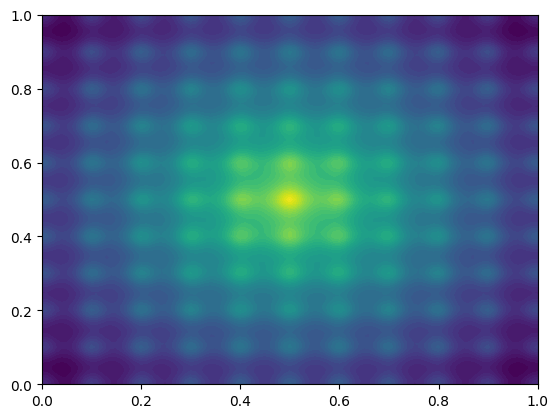

In [21]:
def ObjectiveFunction(X):
    x1 = 10 * (X[0] - 0.5)
    x2 = 10 * (X[1] - 0.5)

    return - (-20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x1**2 + x2**2))) - np.exp(0.5 * (np.cos(2 * con.pi * x1) + np.cos(2 * con.pi * x2))) + con.e + 20)
 

X1 = np.linspace(0, 1, 101, endpoint=True)
X2 = np.linspace(0, 1, 101, endpoint=True)

# Create the meshgrid
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Combine the grid into an n**2 x 2 matrix
candidate_x = np.vstack([X1_grid.ravel(), X2_grid.ravel()]).T

result = np.empty([len(X1), len(X2)])

for i, x1 in enumerate(X1):
    for j, x2 in enumerate(X2):
        result[i, j] = ObjectiveFunction([x1, x2])

plt.contourf(X1, X2, result, levels=50)
print('Max possible value:', np.max(result))

In [13]:
"""
Configure the optimiser.
"""
Kernel = BOPackage.RBF_Kernel
length_scales = 0.1

AcquisitionFunction = BOPackage.UpperConfidenceBound
max_kappa = 4
min_kappa = 0.1

bounds = np.array([[0, 1], [0, 1]])
acquisition_samples = 1000

In [14]:
log_path = '/work4/clf/jordanlee/Hyades/BayesianOptimisation/Examples/temp.log'

bo = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scales, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                #   random_seed=78
                  )

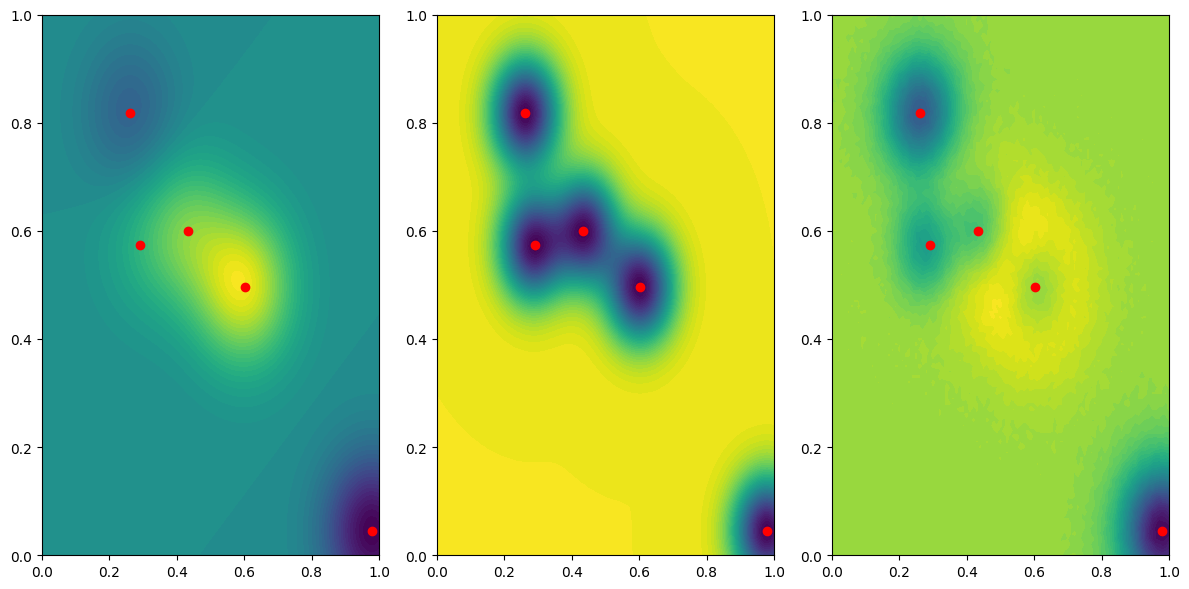

In [15]:
raw_X = bo.GetRandomXBatch(batch_size=5)

raw_Y = np.empty([len(raw_X), 1])
for i, x in enumerate(raw_X):
    raw_Y[i, 0] = ObjectiveFunction(x)
    
bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

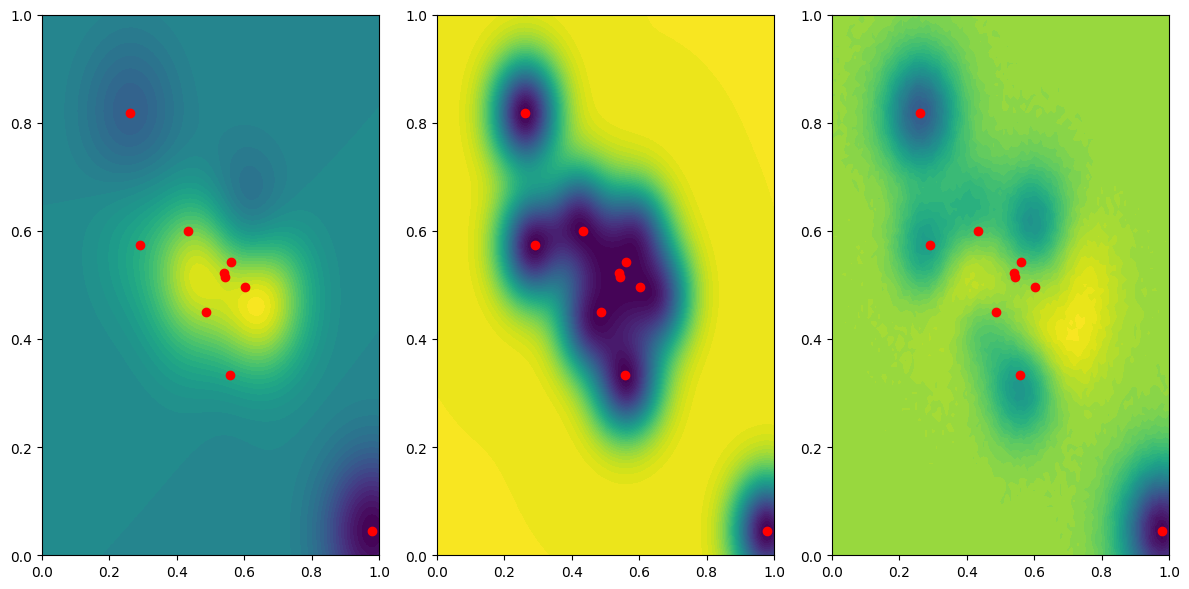

In [16]:
iterations = 1
for i in range(iterations):
    raw_X = bo.GetNextXBatch(batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_Y = np.empty([len(raw_X), 1])
    for i, x in enumerate(raw_X):
        raw_Y[i, 0] = ObjectiveFunction(x)

    bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

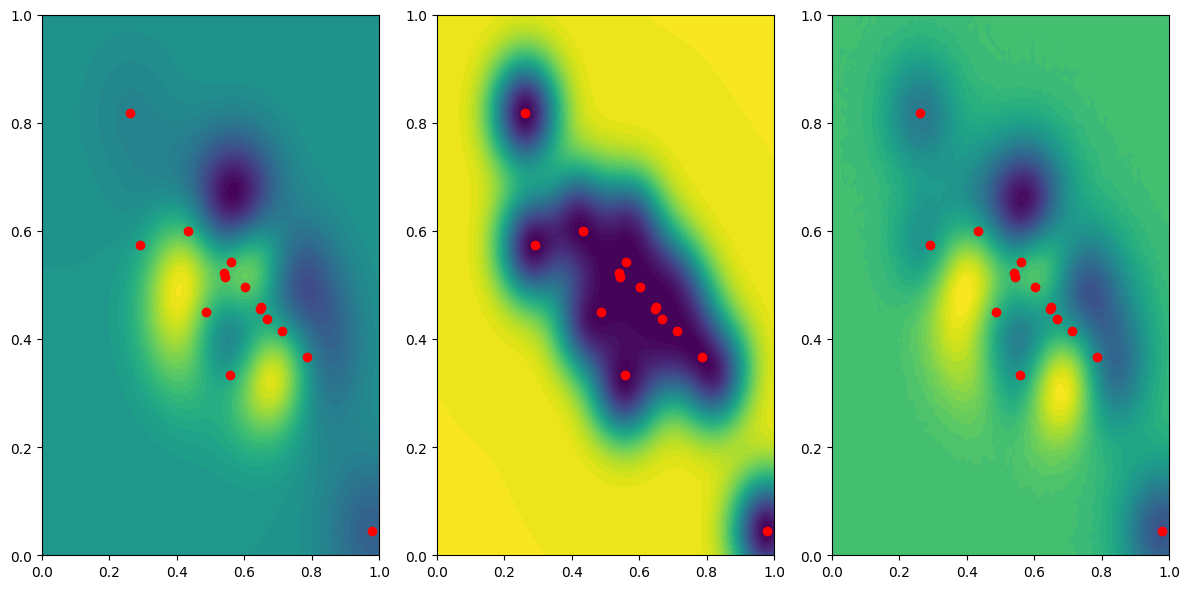

In [17]:
iterations = 1
for i in range(iterations):
    raw_X = bo.GetNextXBatch(batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_Y = np.empty([len(raw_X), 1])
    for i, x in enumerate(raw_X):
        raw_Y[i, 0] = ObjectiveFunction(x)

    bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

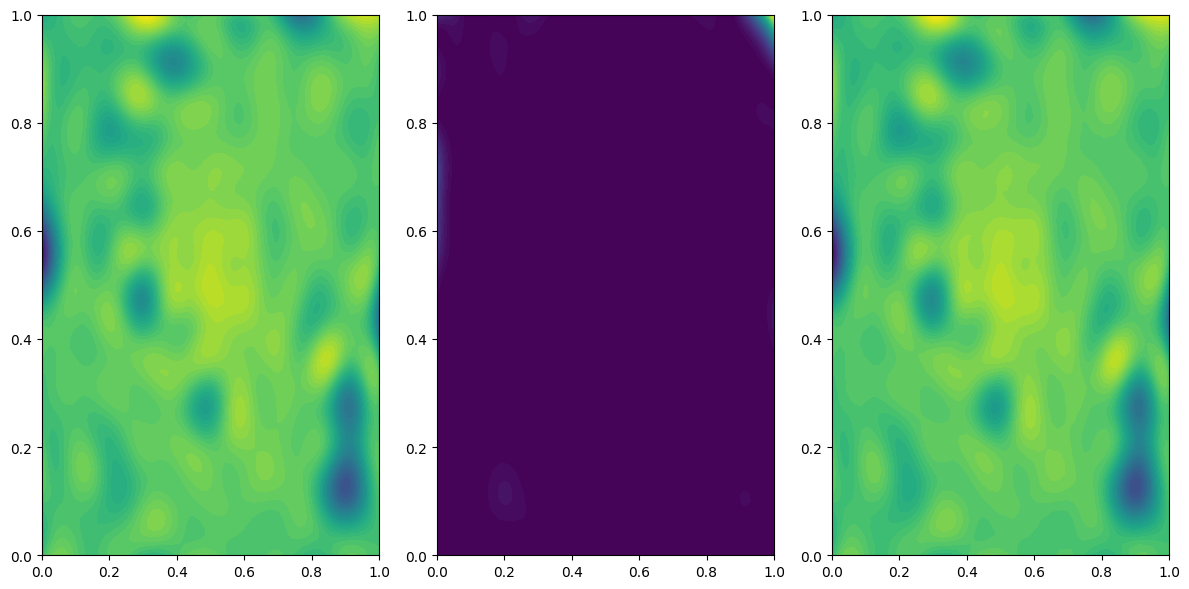

In [18]:
iterations = 45
for i in range(iterations):
    raw_X = bo.GetNextXBatch(batch_size=5, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_Y = np.empty([len(raw_X), 1])
    for i, x in enumerate(raw_X):
        raw_Y[i, 0] = ObjectiveFunction(x)

    bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(candidate_x)
acq_function = bo.AcquisitionFunction(mean, variance, kappa=1)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs[0].contourf(X1, X2, mean.reshape(len(X1), len(X2)), levels=50)
# axs[0].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[1].contourf(X1, X2, variance.reshape(len(X1), len(X2)), levels=50)
# axs[1].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

axs[2].contourf(X1, X2, acq_function.reshape(len(X1), len(X2)), levels=50)
# axs[2].scatter(bo.X_data[:, 0], bo.X_data[:, 1], color='red')

plt.tight_layout()

In [19]:
np.max(variance)

0.39820264686016693

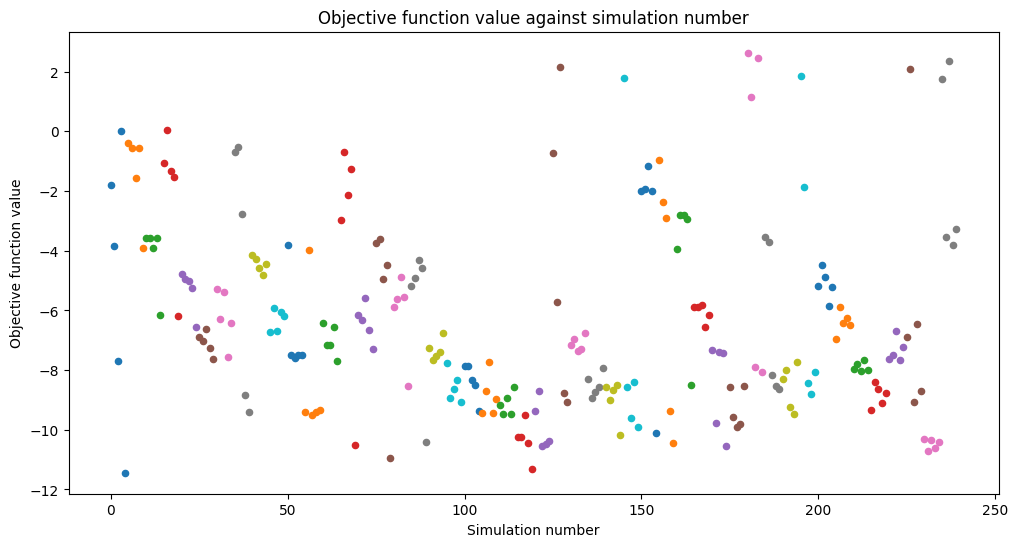

2.635372259971483


In [20]:
BOPackage.PlotData(bo)
print(np.max(bo.y_data))